<a href="https://colab.research.google.com/github/Sedowlas/Time_series/blob/main/Time_series_exchange_rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Arma

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf,plot_predict
from statsmodels.tsa.stattools import adfuller,pacf,acf
from statsmodels.tsa.arima.model import ARIMA

In [78]:
data = pd.read_csv("https://video.ittensive.com/time-series/ittensive.time.series.02.csv",
                   delimiter=";", header=0, names=["Дата", "Курс", "Ипотека"])
data = data[::-1].reset_index().drop(labels="index", axis=1)
data.head()

,Дата,Курс,Ипотека
0,11.01.2022,75.1315,9.84
1,12.01.2022,74.8355,9.84
2,13.01.2022,74.5277,9.84
3,14.01.2022,74.5686,9.84
4,15.01.2022,75.7668,9.84


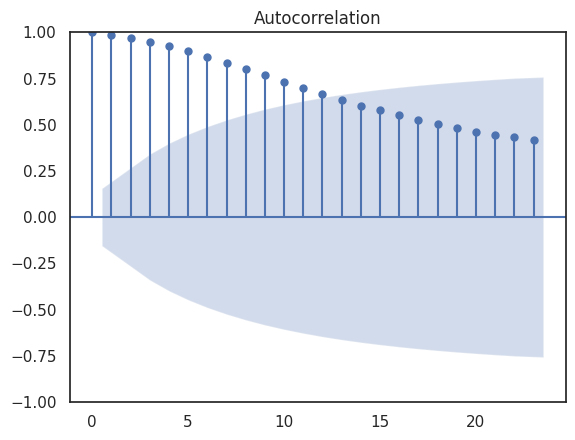

In [79]:
plot_acf(data["Курс"])
plt.show()

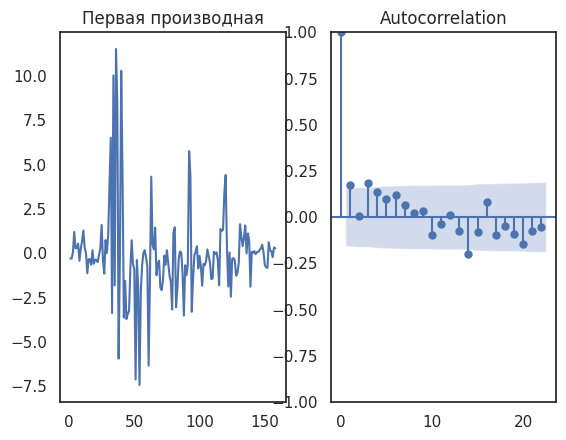

In [80]:
f = plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title("Первая производная")
ax1.plot(data["Курс"].diff())

ax2 = f.add_subplot(122)
plot_acf(data["Курс"].diff().dropna(), ax=ax2)
plt.show()

## Подбираем коэффициенты

Модель ARMA использует два целочисленных параметра: p и q.

* p – порядок авторегрессии (AR). Его можно интерпретировать как выражение «элемент ряда будет близок к Х, если предыдущие р элементов были близки к Х».
* q – порядок скользящего среднего (MA), который позволяет установить погрешность модели как линейную комбинацию наблюдавшихся ранее значений ошибок.

---

##We select coefficients

The ARMA model uses two integer parameters: p and q.

* p is the autoregression order (AR). It can be interpreted as the expression "the element of the series will be close to X if the previous p elements were close to X".
* q is the order of the moving average (MA), which allows you to set the model error as a linear combination of previously observed error values.

In [81]:
data_ = data["Курс"]
pacf_coeff = np.zeros(22)
for p in range(1, 3):
    data_ = data_.diff().dropna()
    pacf_coeff += np.abs(pacf(data_))
pacf_coeff = list(pacf_coeff)
p_best = pacf_coeff.index(max(pacf_coeff))+1
print ("Порядок авторегрессии (AR) равен", p_best)

Порядок авторегрессии (AR) равен 1


Ищем наибольший вклад компоненты в корреляцию по первым двум производным  

---
We are looking for the largest contribution of the component to the correlation by the first two derivatives


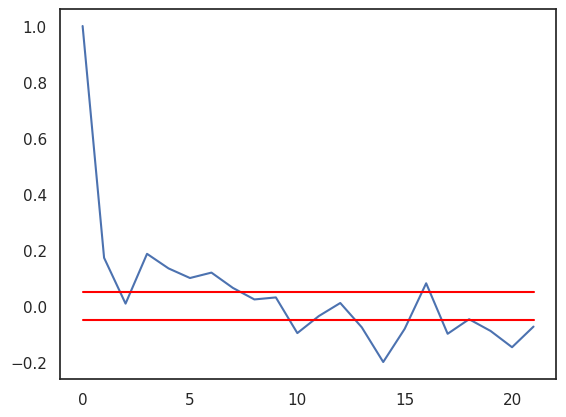

q – порядок скользящего среднего (MA) равен 2


In [82]:
q_best = 0
result = acf(data["Курс"].diff().dropna())
plt.plot(result)
plt.plot([0.05]*len(result), color="red")
plt.plot([-0.05]*len(result), color="red")
plt.show()
for i in range(len(result)):
    if abs(result[i]) > 0.05:
        q_best = i + 1
    else:
        break
print ("q – порядок скользящего среднего (MA) равен", q_best)

Ищем порядок скользящего среднего (по вкладу компонентов первой производной  


---

We are looking for the order of the moving average (by the contribution of the components of the first derivative

## Строим модель


---

## Building a model

In [83]:
model = ARIMA(data["Курс"], order=(p_best, 0, q_best)).fit()
print (model.summary())

                               SARIMAX Results                                
Dep. Variable:                   Курс   No. Observations:                  159
Model:                 ARIMA(1, 0, 2)   Log Likelihood                -369.112
Date:                Fri, 31 Mar 2023   AIC                            748.224
Time:                        18:06:49   BIC                            763.568
Sample:                             0   HQIC                           754.455
                                - 159                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         70.3057     15.603      4.506      0.000      39.724     100.888
ar.L1          0.9803      0.013     73.680      0.000       0.954       1.006
ma.L1          0.2013      0.055      3.669      0.0

Переберем все коэффициенты "по сетке", выберем лучший вариант AIC


---
Let's go through all the coefficients "on the grid", choose the best AIC option


In [84]:
aic_best = model.aic
coeff_best = (p_best, 0, q_best)
for p in range(1,5):
    for q in range(1,5):
        model_ = ARIMA(data["Курс"], order=(p, 0, q)).fit()
        aic = model_.aic
        if aic < aic_best:
            coeff_best = (p, 0, q)
            aic_best = aic
print ("Наилучшие коффициенты:", coeff_best)

Наилучшие коффициенты: (2, 0, 3)


## Визуализация результата


---

## Visualization of the result

In [85]:
model = ARIMA(data["Курс"][:-10], order=(p_best, 0, q_best)).fit()
forecast = model.get_forecast(steps=10).predicted_mean

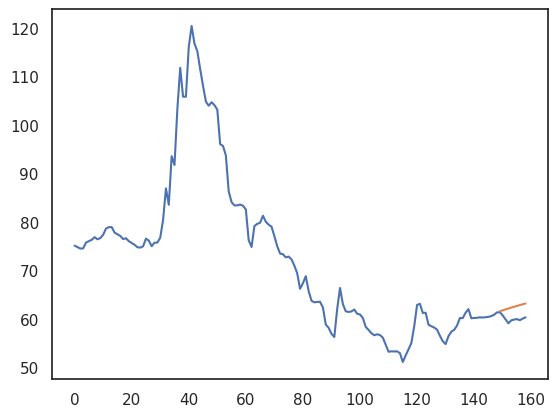

In [86]:
plt.plot(data["Курс"])
plt.plot(forecast)
plt.show()

Оценим ошибку


---
Let's evaluate the error


In [87]:
def smape(A, F):
    return 100*np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))

In [88]:
print ("Ошибка модели | Model error:", smape(data["Курс"][-10:], forecast))

Ошибка модели | Model error: 37.91886763247961


###Arima

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf,plot_predict
from statsmodels.tsa.stattools import adfuller,pacf,acf
from statsmodels.tsa.arima.model import ARIMA

In [90]:
def smape(A, F):
    return 100*np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))

In [91]:
data = pd.read_csv("https://video.ittensive.com/time-series/ittensive.time.series.02.csv",
                   delimiter=";", header=0, names=["Дата", "Курс", "Ипотека"])
data = data[::-1].reset_index().drop(labels="index", axis=1)
data.head()

,Дата,Курс,Ипотека
0,11.01.2022,75.1315,9.84
1,12.01.2022,74.8355,9.84
2,13.01.2022,74.5277,9.84
3,14.01.2022,74.5686,9.84
4,15.01.2022,75.7668,9.84


## Подбираем коэффициенты

Модель ARIMA использует три целочисленных параметра: p, d и q.

* p – порядок авторегрессии (AR). Его можно интерпретировать как выражение «элемент ряда будет близок к Х, если предыдущие р элементов были близки к Х».
* d – порядок интегрирования (I) разностей исходного временного ряда. Можно понимать как «элемент будет близок по значению к предыдущим d элементам, если их разность минимальна».
* q – порядок скользящего среднего (MA), который позволяет установить погрешность модели как линейную комбинацию наблюдавшихся ранее значений ошибок.


---

## We select coefficients

The ARIMA model uses three integer parameters: p, d and q.

* p is the autoregression order (AR). It can be interpreted as the expression "the element of the series will be close to X if the previous p elements were close to X".
* d is the order of integration (I) of the differences of the original time series. It can be understood as "an element will be close in value to the previous d elements if their difference is minimal".
* q is the order of the moving average (MA), which allows you to set the model error as a linear combination of previously observed error values.

In [92]:
data_ = data["Курс"]
pacf_coeff = np.zeros(22)
for p in range(1, 3):
    data_ = data_.diff().dropna()
    pacf_coeff += np.abs(pacf(data_))
pacf_coeff = list(pacf_coeff)
p_best = pacf_coeff.index(max(pacf_coeff))+1
print ("Порядок авторегрессии (AR) равен", p_best)

Порядок авторегрессии (AR) равен 1


Ищем наибольший вклад компоненты в корреляцию по первым двум производным  


---

We are looking for the largest contribution of the component to the correlation by the first two derivatives

In [93]:
data_ = data["Курс"]
d_best = 0
for d in range(1, 5):
    data_ = data_.diff().dropna()
    result = adfuller(data_)
    print ("p-значение для " + str(d) + "-производной ряда", result[1])
    if d_best == 0 and result[1] < 0.05:
        d_best = d
print ("d – порядок интегрирования (I) равен", d_best)

p-значение для 1-производной ряда 1.647543205395404e-06
p-значение для 2-производной ряда 1.01216056414529e-15
p-значение для 3-производной ряда 7.120990020396329e-11
p-значение для 4-производной ряда 2.315679323574174e-16
d – порядок интегрирования (I) равен 1


Проведем тест Дики-Фуллера на стационарность данных производных временного ряда для нахождения порядка интегрирования  


---
We will conduct a Dickey-Fuller test for the stationarity of these derivatives of a time series to find the order of integration


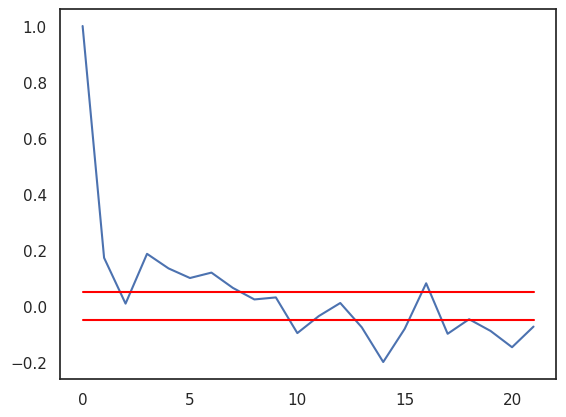

q – порядок скользящего среднего (MA) равен 2


In [94]:
q_best = 0
result = acf(data["Курс"].diff().dropna())
plt.plot(result)
plt.plot([0.05]*len(result), color="red")
plt.plot([-0.05]*len(result), color="red")
plt.show()
for i in range(len(result)):
    if abs(result[i]) > 0.05:
        q_best = i + 1
    else:
        break
print ("q – порядок скользящего среднего (MA) равен", q_best)

Ищем порядок скользящего среднего (по вкладу компонентов первой производной)  


---

We are looking for the order of the moving average (by the contribution of the components of the first derivative)

## Строим модель


---

## Building a model

In [95]:
model = ARIMA(data["Курс"], order=(p_best, d_best, q_best)).fit()
print (model.summary())

                               SARIMAX Results                                
Dep. Variable:                   Курс   No. Observations:                  159
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -364.993
Date:                Fri, 31 Mar 2023   AIC                            737.987
Time:                        18:06:58   BIC                            750.237
Sample:                             0   HQIC                           742.962
                                - 159                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8350      0.147      5.688      0.000       0.547       1.123
ma.L1         -0.6711      0.169     -3.973      0.000      -1.002      -0.340
ma.L2         -0.0555      0.058     -0.950      0.3

Переберем все коэффициенты "по сетке", выберем лучший вариант AIC


---

Let's go through all the coefficients "on the grid", choose the best AIC option

In [96]:
aic_best = model.aic
coeff_best = (p_best, d_best, q_best)
for p in range(1,5):
    for d in range(1,5):
        for q in range(1,5):
            model_ = ARIMA(data["Курс"], order=(p, d, q)).fit()
            aic = model_.aic
            if aic < aic_best:
                coeff_best = (p, d, q)
                aic_best = aic
print ("Наилучшие коффициенты:", coeff_best)

Наилучшие коффициенты: (2, 1, 3)


## Визуализация результата


---
## Visualization of the result


In [97]:
model = ARIMA(data["Курс"][:-10], order=coeff_best).fit()
forecast = model.get_forecast(steps=10).predicted_mean

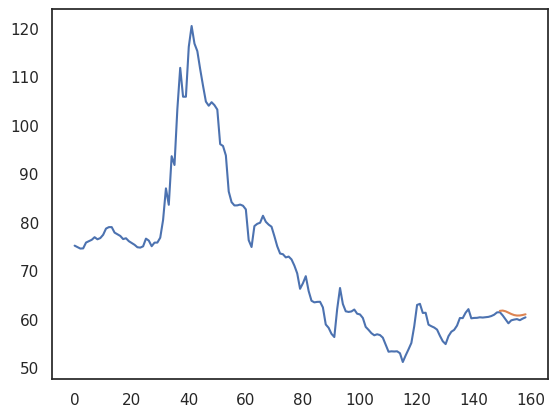

In [98]:
plt.plot(data["Курс"])
plt.plot(forecast)
plt.show()

Оценим ошибку


---
Let's evaluate the error


In [99]:
print ("Ошибка модели | Model error:", smape(data["Курс"][-10:], forecast))

Ошибка модели | Model error: 17.24389406867056


###Sarima

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [101]:
def smape(A, F):
    return 100*np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))

In [102]:
data = pd.read_csv("https://video.ittensive.com/time-series/ittensive.time.series.02.csv",
                   delimiter=";", header=0, names=["Дата", "Курс", "Ипотека"])
data = data[::-1].reset_index().drop(labels="index", axis=1)
data.head()

,Дата,Курс,Ипотека
0,11.01.2022,75.1315,9.84
1,12.01.2022,74.8355,9.84
2,13.01.2022,74.5277,9.84
3,14.01.2022,74.5686,9.84
4,15.01.2022,75.7668,9.84


## Подбираем коэффициенты

Модель SARIMA использует шесть целочисленных параметра: p, d, q, P, D, Q.

* p – порядок авторегрессии (AR). Его можно интерпретировать как выражение «элемент ряда будет близок к Х, если предыдущие р элементов были близки к Х».
* d – порядок интегрирования (I) разностей исходного временного ряда. Можно понимать как «элемент будет близок по значению к предыдущим d элементам, если их разность минимальна».
* q – порядок скользящего среднего (MA), который позволяет установить погрешность модели как линейную комбинацию наблюдавшихся ранее значений ошибок.
* P - порядок сезонной авторегрессии
* D - порядок сезонного интегрирования
* Q - порядок сезонного скользящего среднего
* T (период сезона) - 7


---

## We select coefficients

The SARIMA model uses six integer parameters: p, d, q, P, D, Q.

* p is the autoregression order (AR). It can be interpreted as the expression "the element of the series will be close to X if the previous p elements were close to X".
* d is the order of integration (I) of the differences of the original time series. It can be understood as "an element will be close in value to the previous d elements if their difference is minimal".
* q is the order of the moving average (MA), which allows you to set the model error as a linear combination of previously observed error values.
* P - the order of seasonal autoregression
* D - order of seasonal integration
* Q - order of seasonal moving average
* T (season period) - 7

## Строим модель


---

## Building a model

In [103]:
model = SARIMAX(data["Курс"], order=(2, 1, 3), seasonal_order=(1,1,1,7)).fit()
print (model.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                Курс   No. Observations:                  159
Model:             SARIMAX(2, 1, 3)x(1, 1, [1], 7)   Log Likelihood                -354.272
Date:                             Fri, 31 Mar 2023   AIC                            724.544
Time:                                     18:07:36   BIC                            748.682
Sample:                                          0   HQIC                           734.350
                                             - 159                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4686      0.070     20.923      0.000       1.331       1.606
ar.L2         -0.7487      

Переберем все коэффициенты "по сетке", выберем лучший вариант AIC


---

Let's go through all the coefficients "on the grid", choose the best AIC option


In [104]:
aic_best = model.aic
seasonal_coeff_best = (1, 1, 1, 7)
for P in range(1,3):
    for D in range(1,3):
        for Q in range(1,3):
            model_ = SARIMAX(data["Курс"], order=(2, 1, 3), seasonal_order=(P, D, Q, 7)).fit()
            aic = model_.aic
            if aic < aic_best:
                seasonal_coeff_best = (P, D, Q, 7)
                aic_best = aic
print ("Наилучшие коффициенты:", seasonal_coeff_best)

Наилучшие коффициенты: (1, 1, 1, 7)


Наилучшие коффициенты: (1, 1, 1, 7)


---

Best odds: (1, 1, 1, 7)

## Визуализация результата


---

## Visualization of the result

In [105]:
model = SARIMAX(data["Курс"][:-10], order=(2, 1, 3), seasonal_order=seasonal_coeff_best).fit()
forecast = model.get_forecast(steps=10).predicted_mean

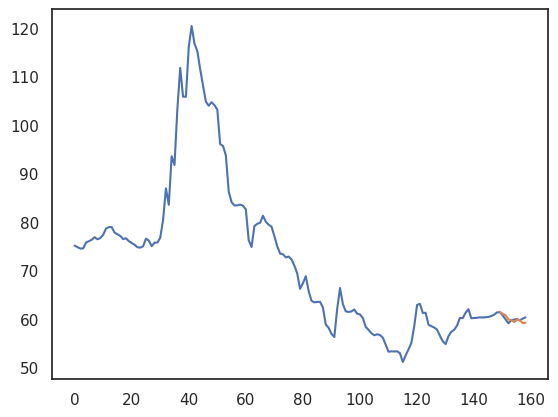

In [106]:
plt.plot(data["Курс"])
plt.plot(forecast)
plt.show()

Оценим ошибку


---
Let's evaluate the error


In [107]:
print ("Ошибка модели | Model error:", smape(data["Курс"][-10:], forecast))

Ошибка модели | Model error: 8.011181929172675


###Propnet

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from datetime import datetime
dateparse = lambda x: datetime.strptime(x, '%d.%m.%Y')

In [109]:
def smape(A, F):
    return 100*np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))

In [110]:
data = pd.read_csv("https://video.ittensive.com/time-series/ittensive.time.series.02.csv",
                   delimiter=";", header=0, names=["Дата", "Курс", "Ипотека"], date_parser=dateparse, parse_dates=['Дата'])
data = data.drop("Ипотека", axis=1)
data = data[::-1].reset_index().drop(labels="index", axis=1)
data.head()

,Дата,Курс
0,2022-01-11,75.1315
1,2022-01-12,74.8355
2,2022-01-13,74.5277
3,2022-01-14,74.5686
4,2022-01-15,75.7668


## Строим модель


---
## Building a model


In [111]:
data.columns = ["ds", "y"]
data[:-11]

,ds,y
0,2022-01-11,75.1315
1,2022-01-12,74.8355
2,2022-01-13,74.5277
3,2022-01-14,74.5686
4,2022-01-15,75.7668
...,...,...
143,2022-08-09,60.3164
144,2022-08-10,60.3814
145,2022-08-11,60.4542
146,2022-08-12,60.6229


In [112]:
model = Prophet()
model.fit(data[:-11])

DEBUG:cmdstanpy:input tempfile: /tmp/tmpuswrdv29/abdghhtq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpuswrdv29/13x1hpcp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29404', 'data', 'file=/tmp/tmpuswrdv29/abdghhtq.json', 'init=/tmp/tmpuswrdv29/13x1hpcp.json', 'output', 'file=/tmp/tmpuswrdv29/prophet_modelq5l6mvel/prophet_model-20230331180808.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:08:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:08:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


## Визуализация результата


---
## Visualization of the result


In [113]:
forecast_ds = model.make_future_dataframe(periods=11)
forecast = model.predict(forecast_ds)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
154,2022-08-20,60.603777,50.114718,66.213244,60.374867,60.852175,-2.400864,-2.400864,-2.400864,-2.400864,-2.400864,-2.400864,0.0,0.0,0.0,58.202914
155,2022-08-21,60.625163,62.403147,78.776077,60.317058,60.949909,9.905495,9.905495,9.905495,9.905495,9.905495,9.905495,0.0,0.0,0.0,70.530658
156,2022-08-22,60.646550,53.892118,69.673924,60.255352,61.041125,0.809748,0.809748,0.809748,0.809748,0.809748,0.809748,0.0,0.0,0.0,61.456297
157,2022-08-23,60.667936,50.233755,66.859421,60.184951,61.137487,-2.115564,-2.115564,-2.115564,-2.115564,-2.115564,-2.115564,0.0,0.0,0.0,58.552371
158,2022-08-24,60.689322,49.674192,66.551568,60.113016,61.260770,-2.703966,-2.703966,-2.703966,-2.703966,-2.703966,-2.703966,0.0,0.0,0.0,57.985355


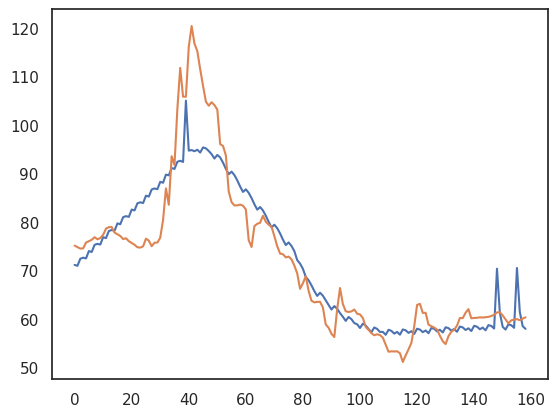

In [114]:
plt.plot(forecast["yhat"])
plt.plot(data["y"])
plt.show()

Оценим ошибку


---
Let's evaluate the error


In [115]:
print ("Ошибка модели | Model error:", smape(data["y"][-10:], forecast["yhat"][-10:]))

Ошибка модели | Model error: 38.21741092827079


###Auto-TS

In [116]:
!pip install autots

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [117]:
!pip install auto_ts

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import autots
from auto_ts import auto_timeseries
from datetime import datetime
dateparse = lambda x: datetime.strptime(x, '%d.%m.%Y')

In [119]:
def smape(A, F):
    return 100*np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))

In [120]:
data = pd.read_csv("https://video.ittensive.com/time-series/ittensive.time.series.02.csv",
                   delimiter=";", header=0, names=["Дата", "Курс", "Ипотека"], date_parser=dateparse, parse_dates=['Дата'])
data = data[::-1].reset_index().drop(labels="index", axis=1)
data.head()

,Дата,Курс,Ипотека
0,2022-01-11,75.1315,9.84
1,2022-01-12,74.8355,9.84
2,2022-01-13,74.5277,9.84
3,2022-01-14,74.5686,9.84
4,2022-01-15,75.7668,9.84


## Строим модель


---
## Building a model


Start of Fit.....
    Auto_TS Machine Learning models can handle multi-label targets = ['Курс', 'Ипотека']
        However, ARIMA, VAR and FB Prophet cannot handle Multi-Label. Hence taking first column = ['Курс', 'Ипотека'] as target.
Start of loading of data.....
    Inputs: ts_column = Дата, sep = ,, target = ['Курс', 'Ипотека']
    Using given input: pandas dataframe...
    Дата column exists in given train data...
    train data shape = (149, 2)
Alert: Could not detect strf_time_format of Дата. Provide strf_time format during "setup" for better results.

Running Augmented Dickey-Fuller test with paramters:
    maxlag: 31 regression: c autolag: BIC
Data is stationary after one differencing
There is 1 differencing needed in this datasets for VAR model


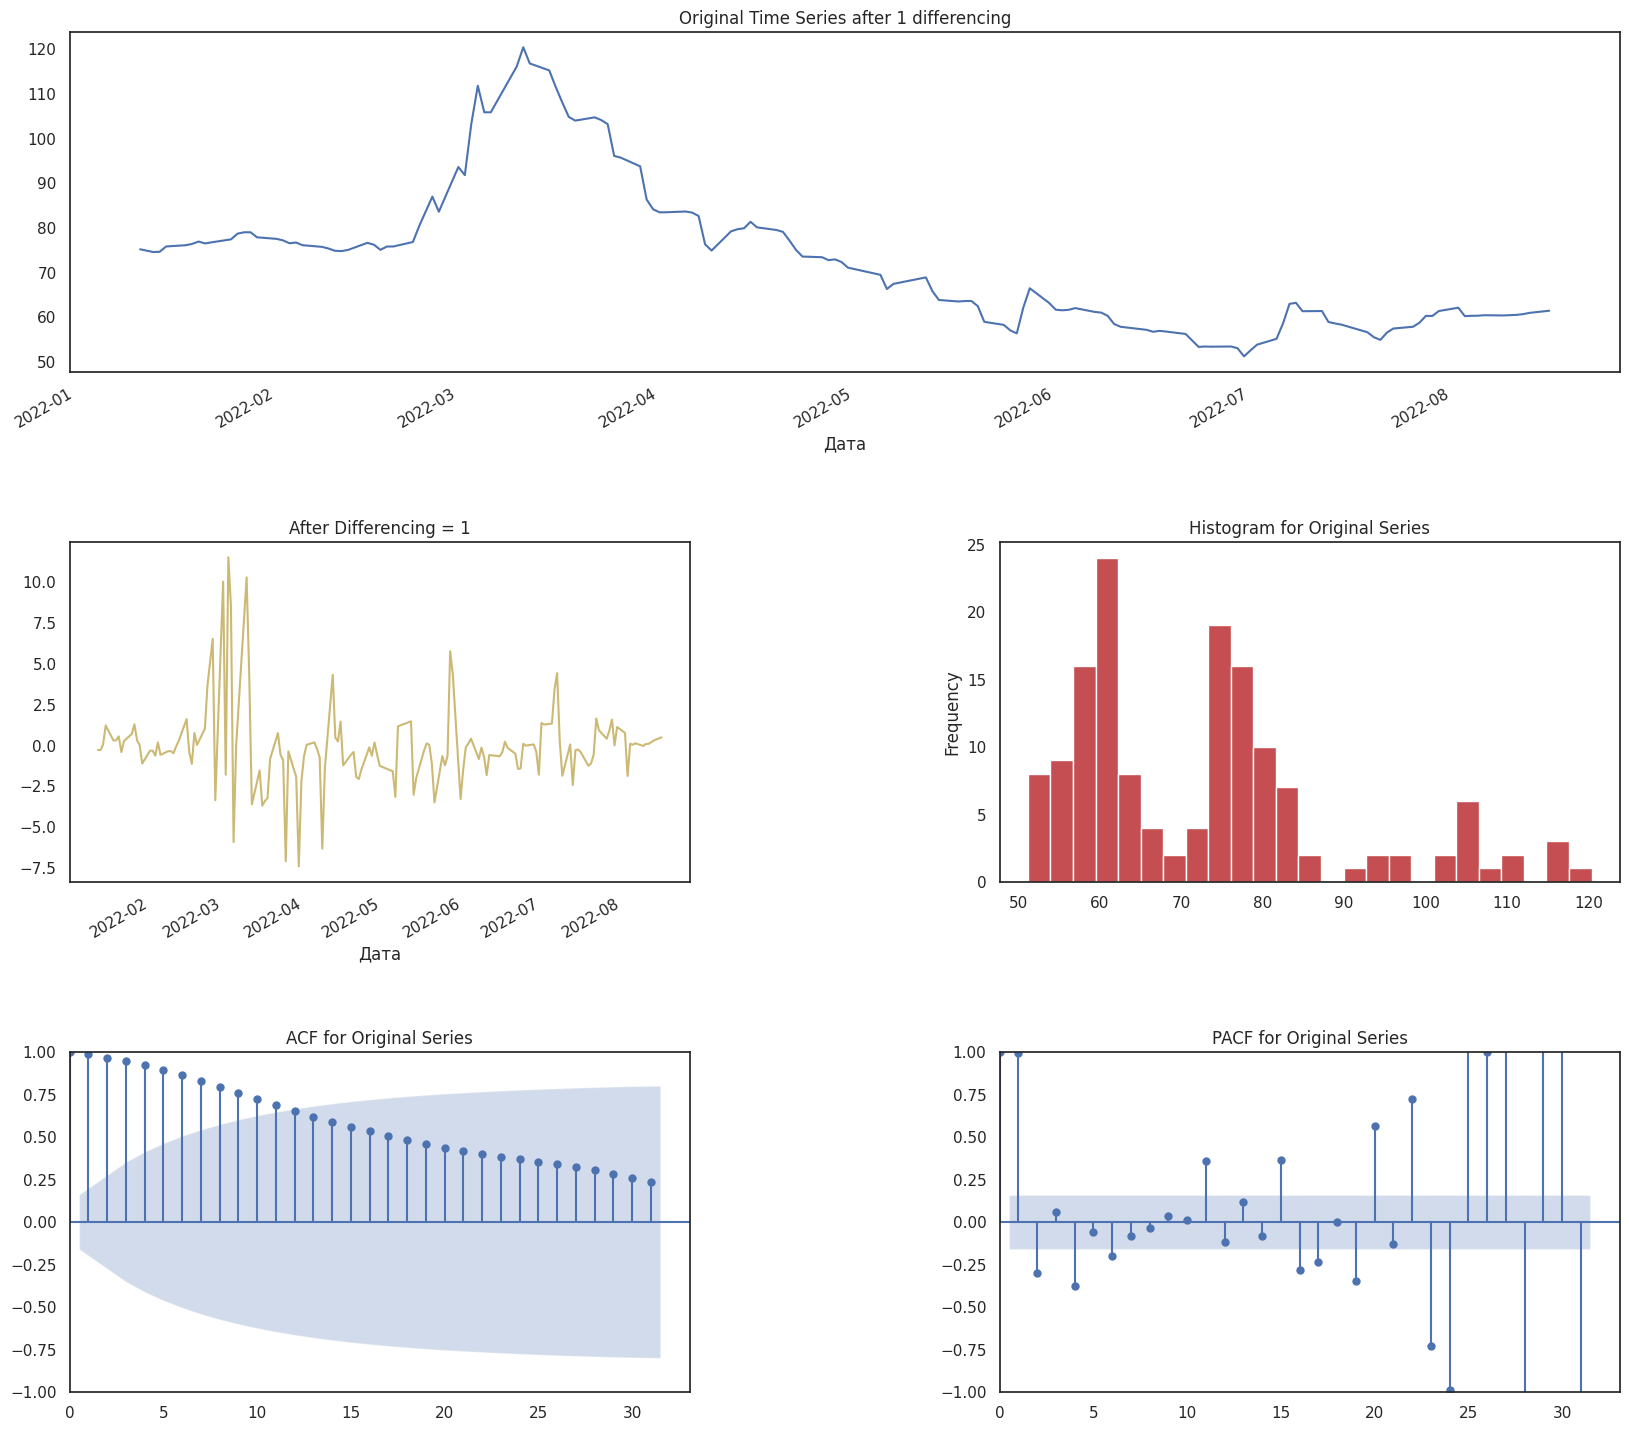

Time Interval is given as D
    Correct Time interval given as a valid Pandas date-range frequency...


Building VAR Model - best suited for small datasets < 1000 rows and < 10 columns



Running VAR Model...
    Shifting 1 predictors by 1 to align prior predictor values with current target values...

Fold Number: 1 --> Train Shape: 123 Test Shape: 5

Additional Variable in VAR model = Ипотека
 Iteration 1 completed
 Iteration 2 completed
 Iteration 3 completed
 Iteration 4 completed
 Iteration 5 completed
 Iteration 6 completed
 Iteration 7 completed
 Iteration 8 completed
 Iteration 9 completed
 Iteration 10 completed
 Iteration 11 completed
 Iteration 12 completed
 Iteration 13 completed
 Iteration 14 completed
 Iteration 15 completed
 Iteration 16 completed
    Best AR order p = 2, MA order q = 3, Interim metric = 879.250
Best variable selected for VAR: Ипотека
    RMSE = 4.43
    Std Deviation of actuals = 0.80
    Normalized RMSE (as pct of std dev) = 27%

Fold Number: 2 --> Trai

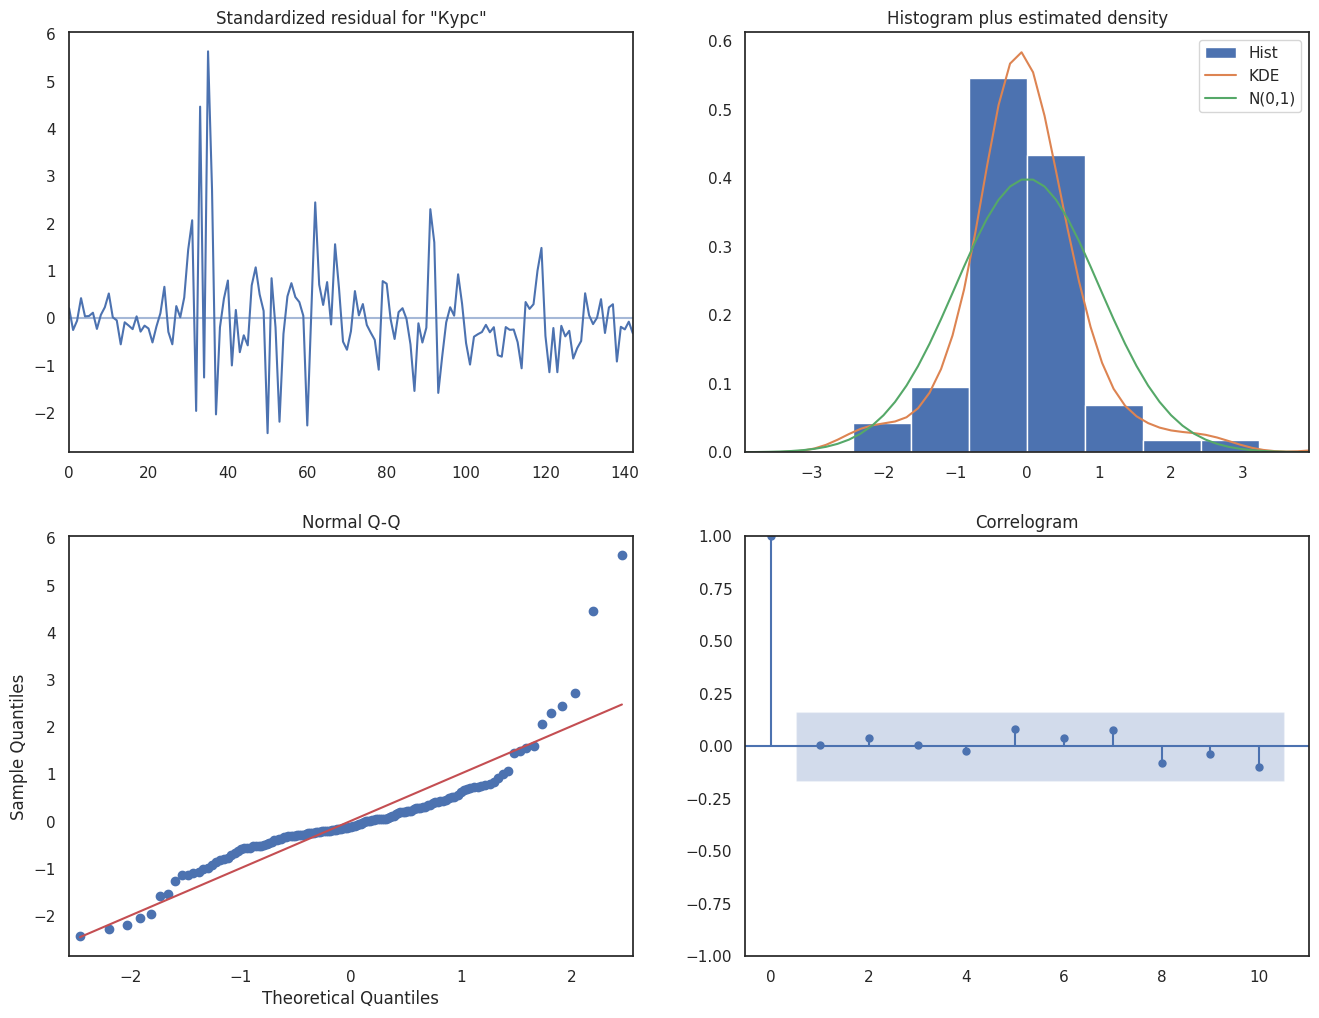

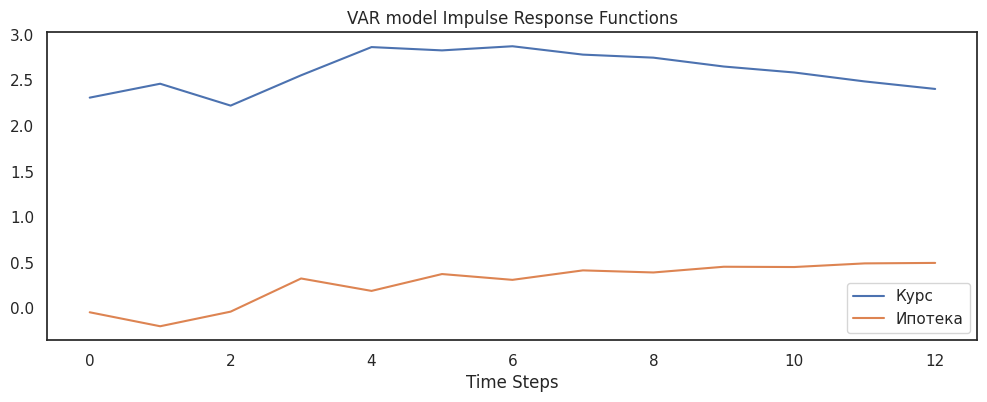

In [121]:
model = auto_timeseries(score_type='rmse',
        time_interval='D', non_seasonal_pdq=None, seasonality=True,
        seasonal_period=5, model_type=['VAR'], verbose=2, dask_xgboost_flag=0)
model.fit(data[:-10], "Дата", ["Курс", "Ипотека"])

## Визуализация результата


---
## Visualization of the result


In [122]:
predictions = model.predict(testdata = 10, model = 'best')
predictions["yhat"].tail()

Predicting using forecast period=10 as input for VAR model


153    64.370379
154    64.887397
155    65.410697
156    65.928531
157    66.445410
Name: yhat, dtype: float64

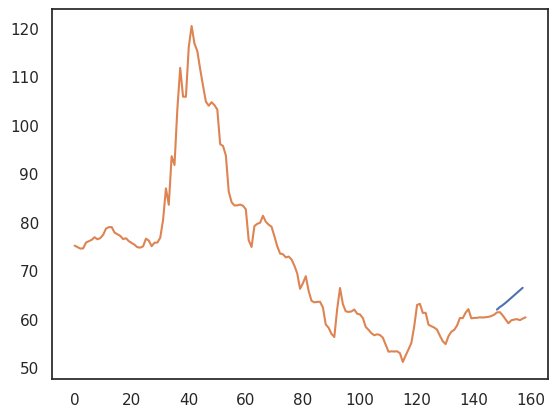

In [123]:
plt.plot(predictions["yhat"])
plt.plot(data["Курс"])
plt.show()

Оценим ошибку


---
Let's evaluate the error


In [124]:
print ("Ошибка модели | Model error:", smape(data["Курс"][-10:], predictions["yhat"]))

Ошибка модели | Model error: 62.25421747581096


In [125]:
data.dtypes

Дата       datetime64[ns]
Курс              float64
Ипотека           float64
dtype: object